In [1]:
import os

import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
sns.set_theme(
    context='paper', 
    palette='colorblind',
    style='whitegrid',
    rc={'text.usetex':True, 'mathtext.fontset':'cm'},
)

In [3]:
%matplotlib inline

In [4]:
from rsnn.utils.utils import load
from rsnn.rsnn.utils import get_stability_matrix

/Users/haguettaz/Documents/RSNN/src/rsnn/rsnn/utils.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
network = load(os.path.join("..","..","Papers","Memories","experiments","resources","network.pkl"))
spike_trains = load(os.path.join("..","..","Papers","Memories","experiments","resources","spike_trains.pkl"))

In [6]:
Phi = get_stability_matrix(network, spike_trains[0])

  0%|          | 0/2738 [00:00<?, ?it/s]

In [7]:
Phi.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [8]:
eigvals = np.linalg.eigvals(Phi)

In [12]:
df = pd.DataFrame.from_dict({"re": eigvals.real, "im": eigvals.imag, "mod": np.abs(eigvals)})

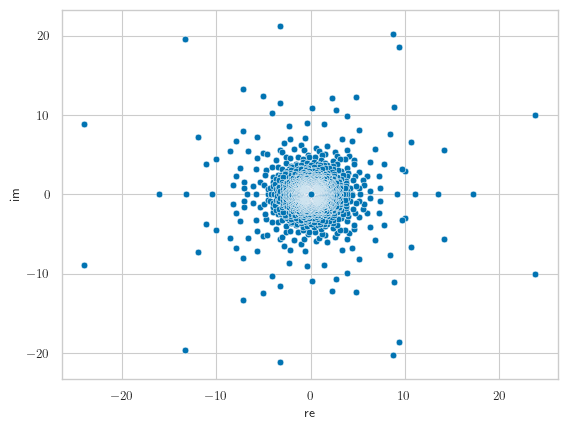

In [13]:
_ = sns.scatterplot(df, x="re", y="im")

In [18]:
rng = np.random.default_rng()

In [30]:
ft = [rng.uniform(0,1,i) for i in range(4)]

In [32]:
np.savez("firing_times.npz", *ft)

In [33]:
npzfile = np.load("firing_times.npz")

KeyError: '0 is not a file in the archive'